#  6.6 Sourcing & Analyzing Time-Series Data

##  This script contains the following:

###  1. Importing libraries and data

###  2.  Subsetting, wrangling, and cleaning time-series data

###  3.  Time series analysis: decomposition

###  4.  Testing for stationarity

###  5.  Stationarization non-stationary GDP data

##  1. Importing libraries and data

In [1]:
# Importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'jk2zrhqns8E5PAx3TG_E'

In [3]:
# Importing the Federal Reserve Economic Data "GDP" variable.

data_GDP = quandl.get('FRED/GDP')

In [4]:
data_GDP.head(5)

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [5]:
data_GDP.shape

(300, 1)

In [6]:
data_GDP.columns

Index(['Value'], dtype='object')

In [7]:
type(data_GDP)

pandas.core.frame.DataFrame

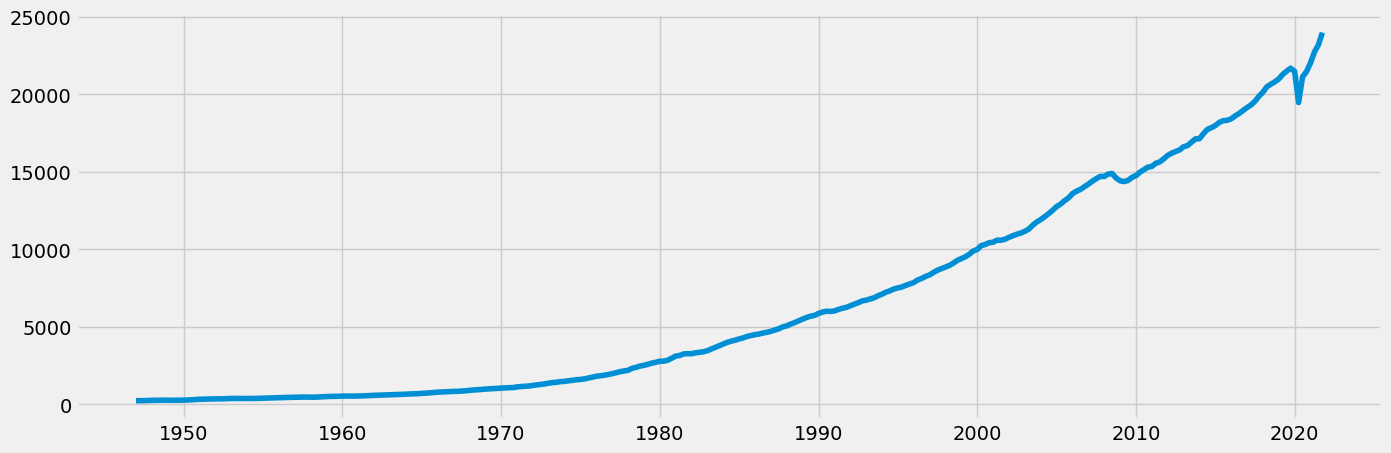

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_GDP)

##  2. Subsetting, wrangling, and cleaning time-series data

In [9]:
# Resetting index so the "Date" column as a filter

data_GDP_2 = data_GDP.reset_index()

In [10]:
data_GDP_2.head()

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [11]:
data_GDP_2.columns

Index(['Date', 'Value'], dtype='object')

In [12]:
data_GDP_2.shape

(300, 2)

In [13]:
data_GDP_2.tail()

,Date,Value
295,2020-10-01,21477.597
296,2021-01-01,22038.226
297,2021-04-01,22740.959
298,2021-07-01,23202.344
299,2021-10-01,23992.355


In [14]:
data_GDP_2 = data_GDP_2.loc[(data_GDP_2['Date'] >= '1980-01-01') & (data_GDP_2['Date'] < '2021-10-01')]

In [15]:
data_GDP_2.shape

(167, 2)

In [16]:
data_GDP_2.head()

,Date,Value
132,1980-01-01,2789.842
133,1980-04-01,2797.352
134,1980-07-01,2856.483
135,1980-10-01,2985.557
136,1981-01-01,3124.206


In [17]:
# Set the "Date" column as the index

from datetime import datetime

data_GDP_2['datetime'] = pd.to_datetime(data_GDP_2['Date']) 
data_GDP_2 = data_GDP_2.set_index('datetime') 
data_GDP_2.drop(['Date'], axis=1, inplace=True) 
data_GDP_2.head()

,Value
datetime,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206


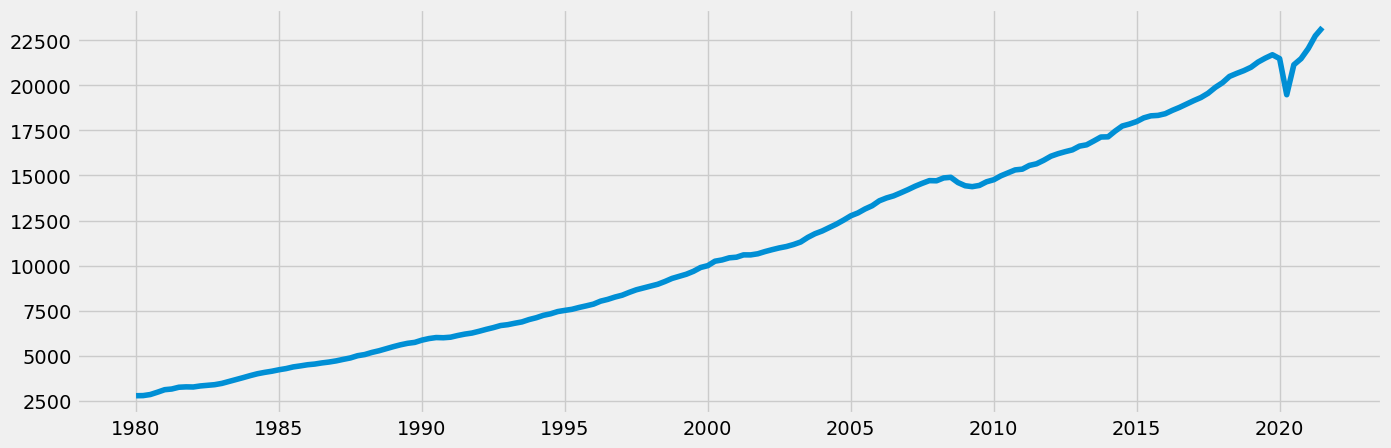

In [18]:
# Plot new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_GDP_2)

In [19]:
# Checking for missing values

data_GDP_2.isnull().sum() 

Value    0
dtype: int64

####  No missing values

In [20]:
# Checking for duplicates

dups = data_GDP_2.duplicated()
dups.sum()

0

####  No duplicate values

####  I selected these data points because even though GDP did grow from 1950-1979, GDP began to significantly increase from 1980 and to 2021.  

##  3. Time series analysis: decomposition

In [21]:
# Decomposing time series using an additive model

decomposition_GDP = sm.tsa.seasonal_decompose(data_GDP_2, model='additive')

In [22]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

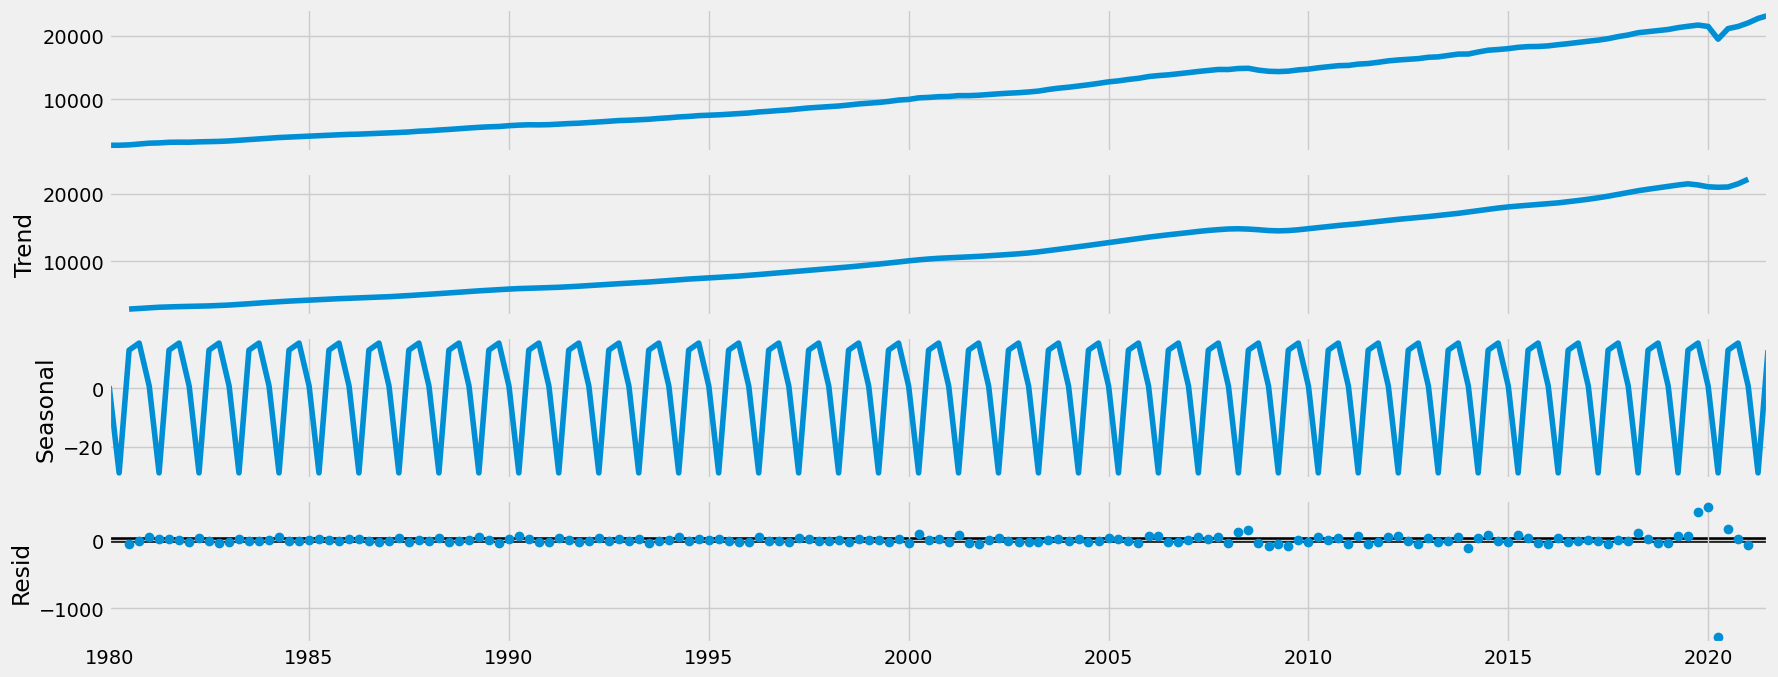

In [23]:
# Plotting separate components

decomposition_GDP.plot()
plt.show()

####  The level and the trend appear to be the same which means the data is smooth and doesn't have much noise.  The trend gradually increases from 1980-2021 with a slight dip around 2008 which was when the global financial crisis occured and another dip in 2020 which was during the global pandemic.  The data shows seasonality which is the beginning and end of each year. There isn't much noise in the data except for 2008 (financial crisis) and 2020 (pandemic).

##  4. Testing for stationarity

In [24]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_GDP_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   3.113738
p-value                          1.000000
Number of Lags Used              8.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


####  The test statistic is greater than the critical values so I can't reject the null hypothesis which means there is a unit root in the data and the data is non-stationary.  Also the p-value is above 0.05 which makes it a non-significant result.  

###  5.  Stationarizing non-stationary GDP data

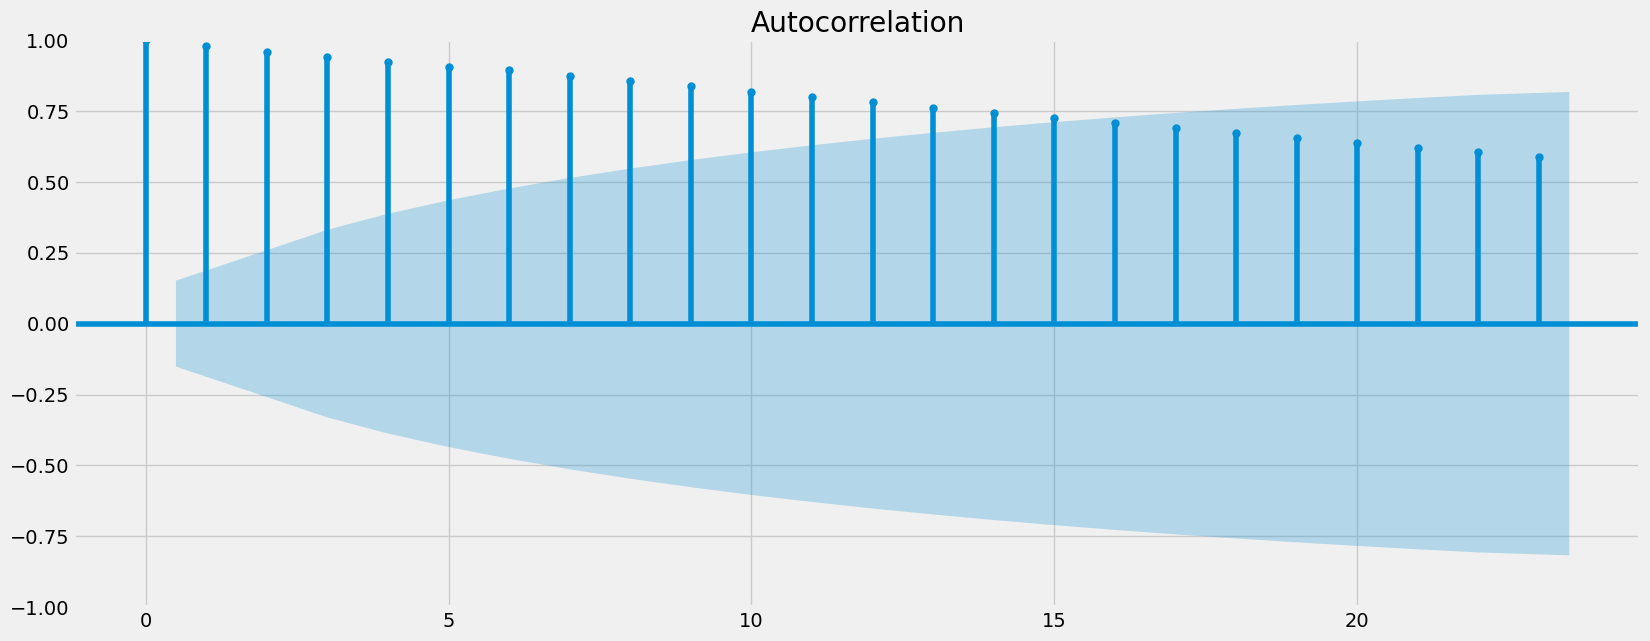

In [25]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_GDP_2)
plt.show()

In [26]:
data_GDP_diff = data_GDP_2 - data_GDP_2.shift(1)

In [27]:
data_GDP_diff.dropna(inplace = True)

In [28]:
data_GDP_diff.head()

,Value
datetime,
1980-04-01,7.510
1980-07-01,59.131
1980-10-01,129.074
1981-01-01,138.649
1981-04-01,38.326


In [29]:
data_GDP_diff.columns

Index(['Value'], dtype='object')

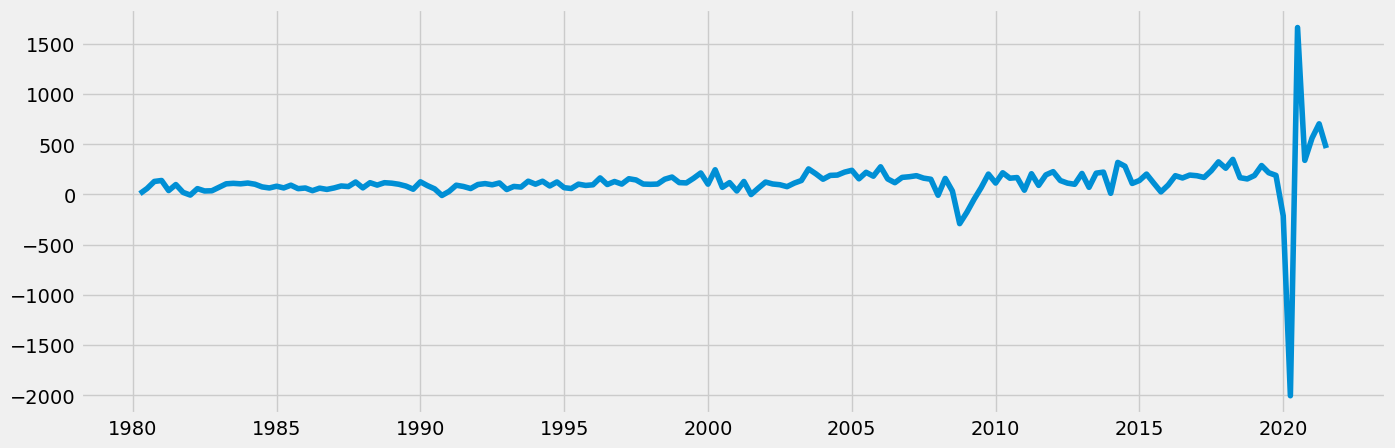

In [30]:
# Checking the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_GDP_diff)

In [31]:
dickey_fuller(data_GDP_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.363996
p-value                          0.000344
Number of Lags Used              7.000000
Number of Observations Used    158.000000
Critical Value (1%)             -3.472431
Critical Value (5%)             -2.880013
Critical Value (10%)            -2.576619
dtype: float64


####  After conducting differencing the test statistic is smaller than the critical values which means the data is now stationary.  The p-value is also under 0.05 which makes it a significant result.

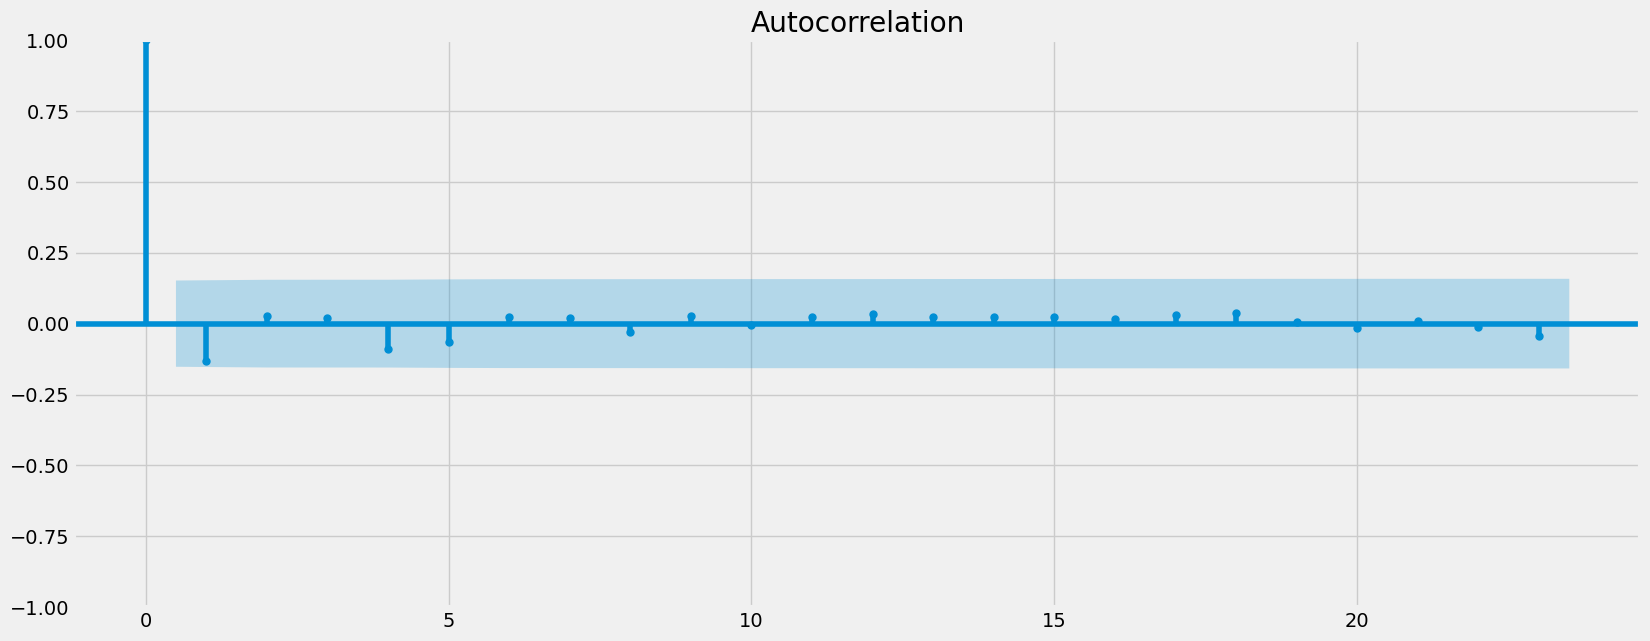

In [32]:
plot_acf(data_GDP_diff)
plt.show()